<a href="https://colab.research.google.com/github/BrandonLCC/Informe_Tecnico_FMY0100/blob/rama-modelos/modelo_4_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Cargar las importaciones y dataset**

In [ ]:
#Las importaciones necesarias
import numpy as np
import pandas as pd # Estructura y manipulación de datos
import matplotlib.pyplot as plt # Graficos
from matplotlib import style # Si va
import seaborn as sns # diseño de Graficos

#---- Importaciónes de scikit learn ----

from sklearn.preprocessing import MinMaxScaler  # Con esta importacion, podemos normalizar los datos, para que la escala de los datos sean entre 0 y 1
from sklearn.preprocessing import LabelEncoder # Para transformar datos categoricos a formato numerico

from sklearn.linear_model import LinearRegression # con esta libreria podemos saber sobre problemas de clasificacion, regresion  y clustering () modelo lineal etc
from sklearn.model_selection import train_test_split

#---- Metricas de modelos de regresión ----

from sklearn.metrics import r2_score # solo lo ocuparemos para problemas de regresion o todo lo que sea numerico
from sklearn.metrics import mean_squared_error #solo para la parte numerica, con esto vamos a poder sumar y sacar el promedio del los datos o el error
from sklearn.metrics import mean_absolute_error

#---- Importación para el modelo SVR ----
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
#from sklearn import svm

#---- Para encontrar los mejores parametros ----
from sklearn.model_selection import GridSearchCV



In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    name = fn

df = pd.read_csv(name, sep=";")

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


<ipython-input-3-b92e9cb142f9>:7: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";")


# **2.PREPARACION DE LOS DATOS**



## Respaldo del dataframe

In [ ]:
# Crear una variable como respaldo para poder arreglar el data set para poder utilizar despues para modelar
df_backup = df.copy()

## Limpieza de datos

In [ ]:
df_backup.drop(columns=['Unnamed: 0'], inplace=True)
# esta colmuna se elimnara ya que solamente contiene datos false lo que indica que ningun jugador ha presentado fallas en las partidas
df_backup.drop(columns=['AbnormalMatch'], inplace=True)
#esta colmuna FirstKillTime la eliminaremos ya que nos sirve para la hipotesis o preguntas
df_backup.drop(columns=['FirstKillTime'], inplace=True)
#Eliminad tiemplive y TravelledDistance podria no ser relevante para el analisis o hipotesis
#df_backup.drop(columns=['TimeAlive'], inplace=True)
#df_backup.drop(columns=['TravelledDistance'], inplace=True)

In [ ]:
# Como hay pocos nulos, eliminamos esas filas
df_backup.dropna(inplace=True)
# Verificar cantidad de nulos
print(df_backup.isnull().sum())

Unnamed: 0                     0
Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int

### Eliminación de datos atipicos

In [ ]:
# Eliminando datos atipicos mayores a 28 de la culumna Asesinatos en la partida
df_backup.drop(df_backup[df_backup['MatchKills'] > 28].index, inplace=True)
df_backup.shape

(78992, 30)

In [ ]:
# Eliminando datos atipicos mayores a 8 de la culumna asistencias en la partida
df_backup.drop(df_backup[df_backup['MatchAssists'] > 8].index, inplace=True)
df_backup.shape

(78707, 30)

* **Ver Valores Únicos en la Columna ""Team" y "Mapa"**

In [ ]:
df_backup.Team.unique()

array(['Terrorist', 'CounterTerrorist'], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
df_backup['Team'] = label_encoder.fit_transform(df_backup['Team'])
df_backup['Map'] = label_encoder.fit_transform(df_backup['Map'])

In [ ]:
df_backup['Map'].unique()

array([1, 3, 2, 0])

## Transformación de los datos Booleanos

In [ ]:
df_backup.RoundWinner = df_backup.RoundWinner.astype(bool)
df_backup.MatchWinner = df_backup.MatchWinner.astype(bool)
# convertir numeros
df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
df_backup.MatchWinner.replace({True: 1, False: 0}, inplace=True)
df_backup.Survived.replace({True: 1, False: 0}, inplace=True)

<ipython-input-10-4fe37939733c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
<ipython-input-10-4fe37939733c>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
<ipython

In [ ]:
# Revisar estructura y tipos
df_backup.info()
# Vista previa de los primeros datos limpios
df_backup.head()

<class 'pandas.core.frame.DataFrame'>
Index: 78707 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   78707 non-null  int64  
 1   Map                          78707 non-null  int64  
 2   Team                         78707 non-null  int64  
 3   InternalTeamId               78707 non-null  int64  
 4   MatchId                      78707 non-null  int64  
 5   RoundId                      78707 non-null  int64  
 6   RoundWinner                  78707 non-null  int64  
 7   MatchWinner                  78707 non-null  int64  
 8   Survived                     78707 non-null  int64  
 9   AbnormalMatch                78707 non-null  bool   
 10  TimeAlive                    78707 non-null  object 
 11  TravelledDistance            78707 non-null  object 
 12  RLethalGrenadesThrown        78707 non-null  int64  
 13  RNonLethalGrenadesThr

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,1,1,1,4,1,1,1,0,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,1,1,1,4,1,1,1,0,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,1,1,1,4,1,1,1,0,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,1,1,1,4,1,1,1,0,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,1,1,1,4,1,1,1,1,False,...,0,0,0,0,1000,4400,0,0,0,0



- limitar las rondas que sean mayores 30 rondas

In [ ]:
#  ajustar rondas que sean mayor a 30
df_backup = df_backup[(df_backup['RoundId'] >= 1) & (df_backup['RoundId'] <= 30)]

df_backup['RoundId'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

# **Support Vector Regression (SVR)**

### SVR: Support Vector Regression (regresión de vectores de soporte)

- la diferencia entre otros modelos es que SVM Nos sirve para datos con mucho ruido

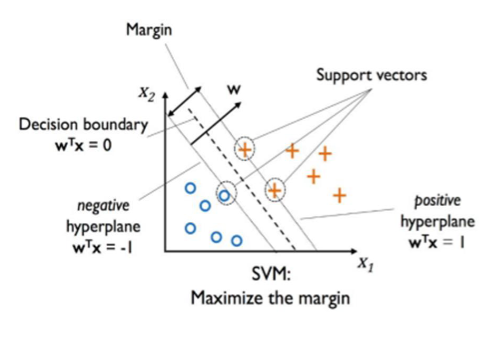

scikit-learn SVM: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

### **Conceptos**  

**Vectores de soporte**: Son precisamente los puntos mas cercanos entre una clase y otra.

**Margen:** Es la distancia entre el **hiperplano** y los **vectores de soporte**

**Hiperplano:** Es la recta que mejor representa el comportamiento de los datos

**Hiperplano óptimo:** La frontera de separación quien consigue el mayor margen posible.

Objetivos al utilizar el modelo SVM

- El objetivo de optimización es maximizar el “margen”



In [ ]:
df_backup.head(2)

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0


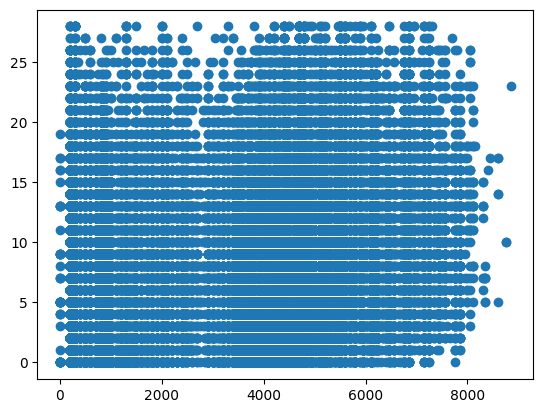

In [ ]:
#plt.scatter(df_backup['RoundStartingEquipmentValue'], df_backup['MatchKills'])

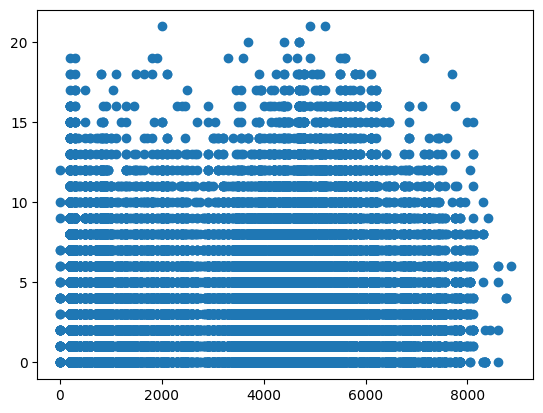

In [ ]:
#plt.scatter(df_backup['RoundStartingEquipmentValue'], df_backup['MatchHeadshots'])

Text(0, 0.5, 'TeamStartingEquipmentValue')

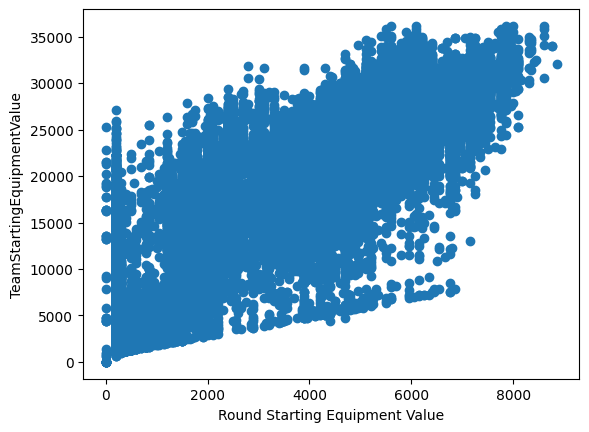

In [ ]:
plt.scatter(df_backup['RoundStartingEquipmentValue'], df_backup['TeamStartingEquipmentValue'])
plt.xlabel('Round Starting Equipment Value')
plt.ylabel('TeamStartingEquipmentValue')

### Separación de los datos: entrenamiento y prueba

In [ ]:
X = df_backup["RoundStartingEquipmentValue"].values.reshape(-1, 1)
y = df_backup['TeamStartingEquipmentValue'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape)
print(X_test.shape)

(63325, 1)
(15832, 1)


### Escala de los datos

¿Porque escalar caracteristicas en SVM?
- El escalado de características consiste en mapear (encontrar) los valores de las características de un conjunto de datos **dentro del mismo rango**.

- Entrenar una SVM con datos escalados y no escalados genera diferentes modelos.

- La estandarización cambia los valores de las características para que tengan una media de cero y luego los asigna a un rango tal que tienen una desviación estándar de 1.



In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

### Creación del modelo SVR y entrenamiento

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

Utilizando el parametro kernel='rbf', obtendremos una separacion no lineal. Lo  que el hiperplano sera curvada

¿Como actuaria el modelo con este parametro?

In [ ]:
#Aqui se usa esta importacion mencionada: from sklearn.svm import SVR
#Utilizamos el parametro de kernel por defecto
modelo = SVR(kernel='rbf') #Creacion del modelo SVR

#valores por defecto de los parametros
#Kernel='lineal', 'poli', 'rbf', 'sigmoide', 'precalculado' o invocable, predeterminado='rbf'
#grado= int, predeterminado=3
#gamma= 'escala', 'automático' o flotante, predeterminado='escala'
#coef=0.0
#tol=0.001
#epsilon=0.1
#C=1.0
#otros: Cache - verbose - max_iter

In [ ]:
modelo.fit(X_train_scaled, y_train_scaled.ravel()) #x: valorEquipamientoInicial y:ValorEquipamientoEquipo

SVR()

### Hacer predicciónes

In [ ]:
y_pred_scaled = modelo.predict(X_test_scaled)

¿Que es descalamiento en SVM?

In [ ]:
#Desescalar las predicciones
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_original = scaler_y.inverse_transform(y_test_scaled)

###Evaluación del modelo

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("--- Metricas del modelo ---")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

--- Metricas del modelo ---
Mean Squared Error (MSE): 11141551.439576402
Mean Absolute Error (MAE): 2158.4057915219987
Root Mean Squared Error (RMSE): 3337.8962595587664
R2 Score: 0.8831988245778932


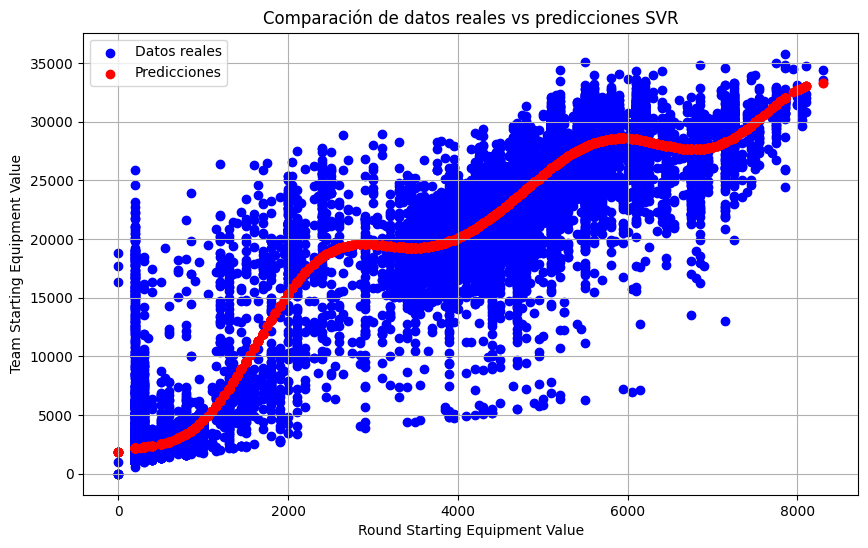

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, y_pred, color='red', label='Predicciones') #aqui tendriamos nuestras predicciones realizadas por el modelo
plt.xlabel('Round Starting Equipment Value')
plt.ylabel('Team Starting Equipment Value')
plt.title('Comparación de datos reales vs predicciones SVR')
plt.legend()
plt.grid(True)
plt.show()

### Parametros del SVR scikit-learn.
Con la clase sklearn.svm.SVR podemos manipular los parametros a nuestro gusto para poder obtener el mejor modelo posible de predicción.

### Parametros

**CV=5:** La validación cruzada K-Fold es una técnica robusta que se utiliza para evaluar el rendimiento de los modelos de aprendizaje automático.

**C:** Penalización (debe ser positiva)

**Epsilon:** Nos dicen que el valor de epsilon "ϵ" define un margen de tolerancia donde no se penaliza ningún error.

**gamma:** Si gamma='scale' se pasa (predeterminado), se utiliza 1 / (n_features * X.var()) como valor de gamma,

si es 'auto', usa 1 / n_features

In [ ]:
# Intento fallido
# Tiempo real de la demora de la ejecucion: 3 horas y 30 minutos
'''
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2],
    'gamma': ['scale', 'auto']
}
'''

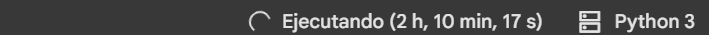

Mejores hiperparámetros: {'C': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor score (neg_mean_squared_error): -0.11699037735310727

--- Metricas del mejor modelo (después de GridSearchCV) ---
Mean Squared Error (MSE): 11141551.439576402
Mean Absolute Error (MAE): 2158.4057915219987
Root Mean Squared Error (RMSE): 3337.8962595587664
R2 Score: 0.8831988245778932


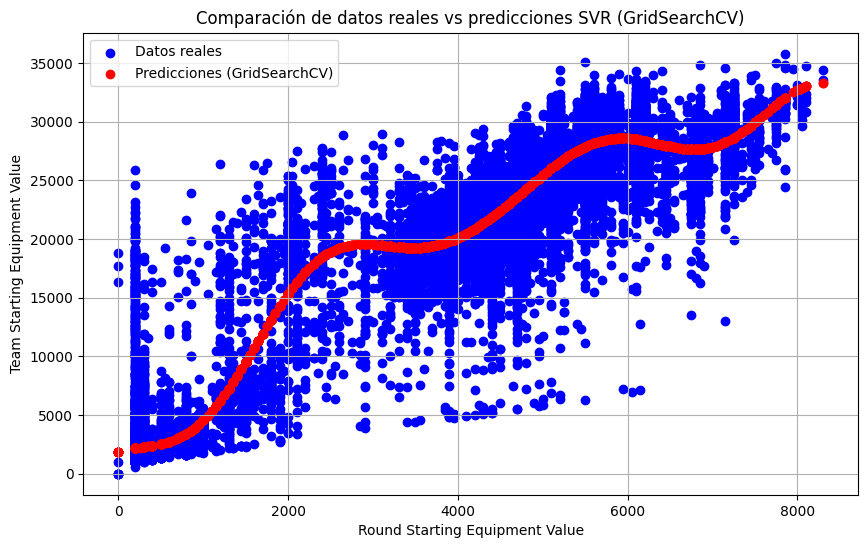

In [ ]:
# Aqui se modifica
param_grid = {
    'kernel': ['rbf'],
    'C': [1, 10],
    'epsilon': [0.1],
    'gamma': ['scale']
}
# cv=5 indica que se usará validación cruzada con 5 folds
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Ejecucion de los mejores hiperparámetros
grid_search.fit(X_train_scaled, y_train_scaled.ravel())

# Imprime los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Imprime el mejor score (MSE negativo)
print("Mejor score (neg_mean_squared_error):", grid_search.best_score_)

# Obtiene el mejor modelo encontrado
best_svr_model = grid_search.best_estimator_

# Ahora puedes usar best_svr_model para hacer predicciones en X_test_scaled
y_pred_best_scaled = best_svr_model.predict(X_test_scaled)

# Desescala las predicciones
y_pred_best = scaler_y.inverse_transform(y_pred_best_scaled.reshape(-1, 1))

# Evalúa el mejor modelo
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)

print("\n--- Metricas del mejor modelo (después de GridSearchCV) ---")
print(f"Mean Squared Error (MSE): {mse_best}")
print(f"Mean Absolute Error (MAE): {mae_best}")
print(f"Root Mean Squared Error (RMSE): {rmse_best}")
print(f"R2 Score: {r2_best}")

#Graficar las predicciones del mejor modelo (eliminar despues)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, y_pred_best, color='red', label='Predicciones (GridSearchCV)')
plt.xlabel('Round Starting Equipment Value')
plt.ylabel('Team Starting Equipment Value')
plt.title('Comparación de datos reales vs predicciones SVR (GridSearchCV)')
plt.legend()
plt.grid(True)
plt.show()


¿Que pasa cuando el valor del equipamiento inicial es de 2000? ¿Cual seria el valor del equipamiento del equipo?

In [ ]:
entrada_dato = np.array([[2000]])
valor_escalado = scaler_X.transform(entrada_dato)
pred_escalada = modelo.predict(valor_escalado)
pred_original = scaler_y.inverse_transform(pred_escalada.reshape(-1, 1))

print(pred_original)

[[15359.34696021]]
